## Topic Modeling using BERT

following https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6

Reference
- https://www.sbert.net/index.html
- https://github.com/UKPLab/sentence-transformers

In [1]:
import os
import re

import pandas as pd

from sentence_transformers import SentenceTransformer

In [2]:
d_dataset = pd.read_json("../data/dataset/jan_sep_2020.json")

In [3]:
d_dataset.head()

,title,url,date
0,Paslon Jekek-Setyo Pilih Tak Sengketakan Kata ...,https://regional.kompas.com/read/2020/09/30/23...,2020-09-30
1,Mobil Terbakar di Depan SPBU Kota Kediri,https://regional.kompas.com/read/2020/09/30/23...,2020-09-30
2,Desa Hargobinangun Sleman Lahirkan Petani Muda,https://regional.kompas.com/read/2020/09/30/23...,2020-09-30
3,"Kisah RFZ, Bocah yang Disiksa Ayah dan Dibuang...",https://regional.kompas.com/read/2020/09/30/23...,2020-09-30
4,Bio Farma Sebut Tak Ditemukan Efek Samping dar...,https://nasional.kompas.com/read/2020/09/30/23...,2020-09-30


In [4]:
d_dataset.shape

(699666, 3)

In [5]:
d_dataset = d_dataset.loc[:9999, ]

In [6]:
d_dataset.shape

(10000, 3)

In [7]:
model = SentenceTransformer('stsb-xlm-r-multilingual')

In [8]:
embeddings = model.encode(d_dataset.title, show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [9]:
import umap
import umap.plot

In [14]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [15]:
umap_embeddings.shape

(10000, 5)

In [11]:
import hdbscan

In [16]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [17]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15,
                      n_components=2,
                      min_dist=0.0,
                      metric='cosine').fit_transform(embeddings)

result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

In [19]:
result

,x,y,labels
0,10.069684,-0.610406,5
1,12.192130,3.740249,5
2,8.620545,1.741865,5
3,12.252832,2.516571,5
4,6.318511,9.916231,-1
...,...,...,...
9995,9.827975,1.507518,5
9996,8.761167,8.838473,10
9997,7.228272,1.825508,5
9998,7.741661,11.764385,16


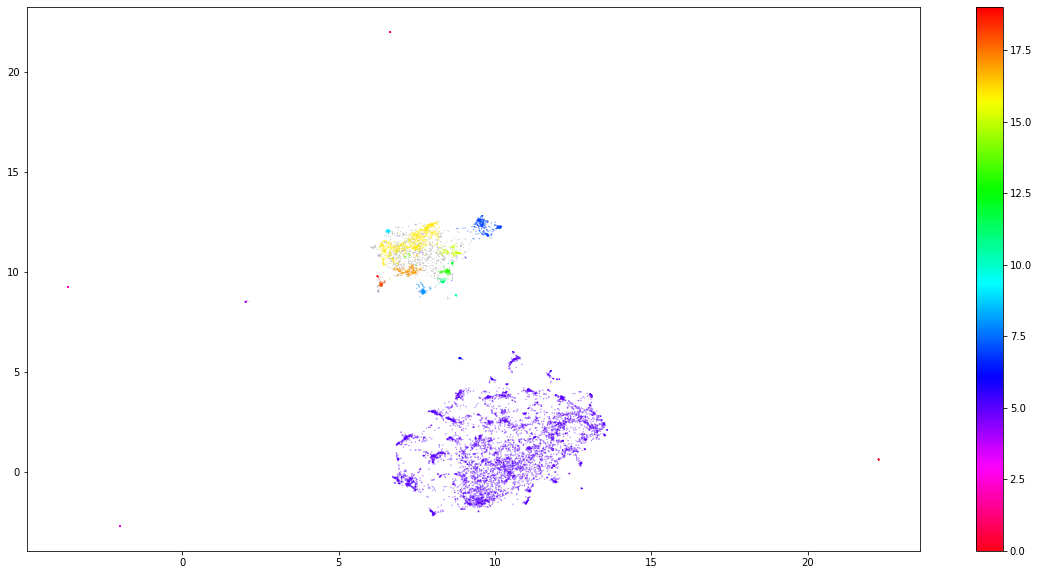

In [18]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()